# Learning Keras 
#### June 21 2018
- Code at https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
- I made some changes:
    - To include cross-validation and testing.
    - Plots to compare predictions with actual data.

In [1]:
import datetime
print('Notebook last updated: {:%Y-%m-%d %H:%M:%S}'.format(datetime.datetime.now()))

Notebook last updated: 2018-06-26 10:53:00


In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# ML modules
from keras.models import Sequential
from keras.layers import Dense


/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
# Set random seed
np.random.seed(2000)
dta=np.loadtxt('pima-indians-diabetes.data.csv',delimiter=",")
print (dta.shape)

X=dta[:,0:8]
Y=dta[:,8]

train=400
validation=150
test=218
print (train+validation+test)

(768, 9)
768


## Form model

In [5]:
# create model
model=Sequential()
model.add(Dense(12,input_dim=8,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [6]:
# compile model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

## Fit model

In [7]:
# fit the model to trainng data
x,y=X[0:train],Y[0:train]
print (x.shape,y.shape)
model.fit(x,y,epochs=150,batch_size=10,shuffle=True)

(400, 8) (400,)
Epoch 1/150
400/400 [==============================] - 0s 634us/step - loss: 6.5471 - acc: 0.4450
Epoch 2/150
400/400 [==============================] - 0s 82us/step - loss: 3.2129 - acc: 0.5325
Epoch 3/150
400/400 [==============================] - 0s 82us/step - loss: 2.2073 - acc: 0.5075
Epoch 4/150
400/400 [==============================] - 0s 84us/step - loss: 1.9416 - acc: 0.5375
Epoch 5/150
400/400 [==============================] - 0s 85us/step - loss: 1.7691 - acc: 0.5500
Epoch 6/150
400/400 [==============================] - 0s 81us/step - loss: 1.5029 - acc: 0.5700
Epoch 7/150
400/400 [==============================] - 0s 84us/step - loss: 1.3991 - acc: 0.5525
Epoch 8/150
400/400 [==============================] - 0s 82us/step - loss: 1.2994 - acc: 0.5675
Epoch 9/150
400/400 [==============================] - 0s 90us/step - loss: 1.2366 - acc: 0.5625
Epoch 10/150
400/400 [==============================] - 0s 85us/step - loss: 1.1911 - acc: 0.5750
Epoch 11/150

## Cross-validation

In [17]:
# evaluate model on cross-validated data
a,b=train,(train+validation)
x,y=X[a:b],Y[a:b]

scores_cv=model.evaluate(x,y)
print ("\n%s: %.2f%%" %(model.metrics_names[1],scores_cv[1]*100))

150/150 [==============================] - 0s 25us/step

acc: 72.67%


<IPython.core.display.Javascript object>


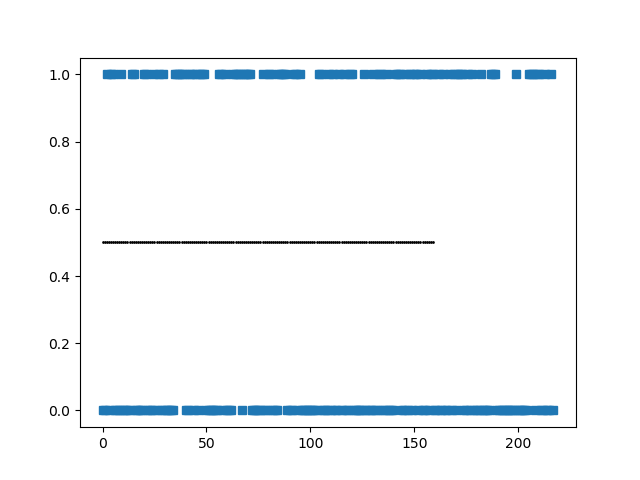

In [35]:
# Plot prediction of cv set
y_predict=[round(ii[0]) for ii in model.predict(x)]
deviate=[0.5 for aa,bb in zip(y,y_predict) if aa==bb]

plt.figure()
# plt.plot(y_predict,marker='o',linestyle='',color='r')
plt.plot(y,marker='s',linestyle='')
plt.plot(deviate,marker='h',markersize=1,linestyle='',color='k')



## Testing

In [36]:
# evaluate model on test data
a,b=validation,(validation+test)
x,y=X[a:b],Y[a:b]
scores_test=model.evaluate(x,y)
print ("\n%s: %.2f%%" %(model.metrics_names[1],scores_test[1]*100))

218/218 [==============================] - 0s 21us/step

acc: 73.39%


<IPython.core.display.Javascript object>


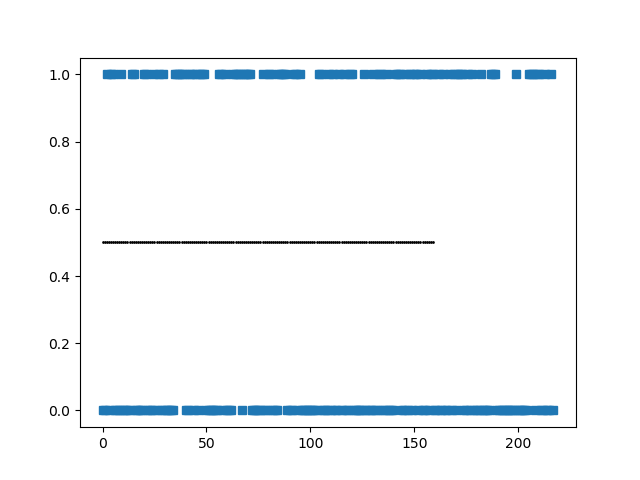

In [34]:
# Plot prediction of training set
y_predict=[round(ii[0]) for ii in model.predict(x)]
deviate=[0.5 for aa,bb in zip(y,y_predict) if aa==bb]

plt.figure()
# plt.plot(y_predict,marker='o',linestyle='',color='r')
plt.plot(y,marker='s',linestyle='')
plt.plot(deviate,marker='h',markersize=1,linestyle='',color='k')



## Prediction

In [37]:
# predict
predictions=model.predict(X)
# round predictions
rounded =[round(x[0]) for x in predictions]
print(rounded)

[1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0,

In [15]:
# evaluate model on test data
a,b=0,train
x,y=X[a:b],Y[a:b]
scores=model.evaluate(x,y)
print ("\n%s: %.2f%%" %(model.metrics_names[1],scores[1]*100))

400/400 [==============================] - 0s 17us/step

acc: 75.50%


## Future direction:
- Try to make modules that does fit, testing and prediction and plotting
- Create class to do all this
- Possible use of Pandas